In [588]:
from util.util import load_curves, load_log

# Load Data
n = [1000, 1500, 2000]
m = [10]
st = [2]
data = {}

for _n in n:
    for _mIdx in range(len(m)):
        folder_name = f"../result/_fix_1/price_curve_{st[_mIdx]}_{m[_mIdx]}_{_n}"
        local_curves, onchain_curve, average_of_local_curves = load_curves(folder_name)
        log = load_log(f"{folder_name}/logs.json")
        data[f"{st[_mIdx]}_{m[_mIdx]}_{_n}"] = {
            "local_curves": local_curves,
            "onchain_curve": onchain_curve,
            "avg_local_curves": average_of_local_curves,
            "log": {
                **log,
                "Gas": log["AliceGas"]
                + log["SuperMatcherGas"]
                + log["ReporterGas"]
                + log["WorkerGas"]
                + log["MatcherGas"],
            },
        }
        
clob_data = {}
for _n in n:
    log = load_log(f"../clob_onchain/log_real_orders_{_n}_1.json")
    clob_data[f"{_n}"] = log

#### Gas

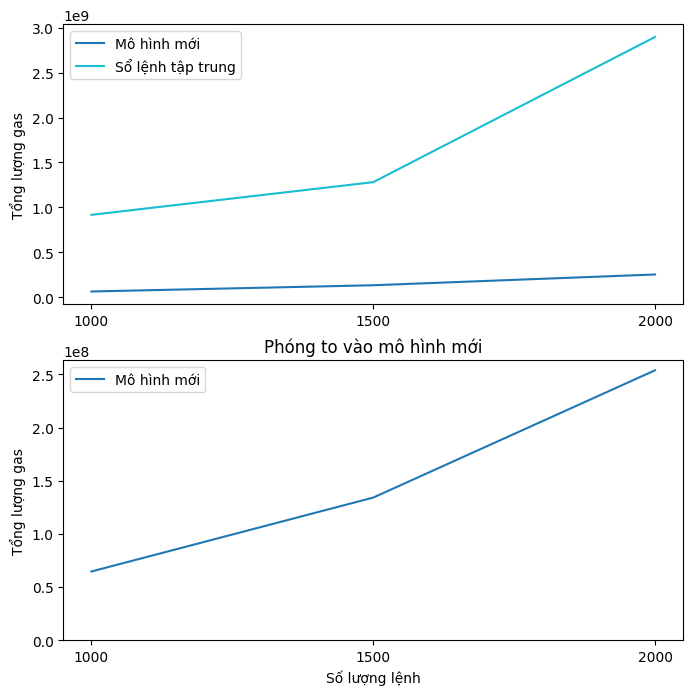

In [589]:

import matplotlib.pyplot as plt

idx = [i for i in range(len(n))]
colors = plt.cm.tab10.colors
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
for i, _m in enumerate(m):
    for j in [0, 1]:
        axes[j].plot(
            [
                data[f"{st[i]}_{_m}_{_n}"]["log"]["Gas"]
                for _n in n
            ],
            label=f"Mô hình mới",
            color=colors[i % len(colors)], 
        )
# CLOB
_clob = [clob_data[f"{_n}"]["Gas"] for _n in n]
axes[0].plot(_clob, label="Sổ lệnh tập trung", color=colors[-1])
axes[0].set_xticks(idx)
axes[0].set_xticklabels(n)
# axes[0].set_title("Gas")
axes[0].set_ylabel("Tổng lượng gas")
axes[0].legend()
    
# axes[1].plot(_clob, label="CLOB", color=colors[-1])
axes[1].set_xticks(idx)
axes[1].set_xticklabels(n)
axes[1].set_title("Phóng to vào mô hình mới")
axes[1].legend()
axes[1].set_xlabel("Số lượng lệnh")
axes[1].set_ylabel("Tổng lượng gas")
axes[1].set_ylim(0)
# axes[1].set_ylim(10**8, 4*10**8)
plt.savefig("Gas_compare_with_clob.png", bbox_inches="tight")
plt.show()

#### NO Matched Orders

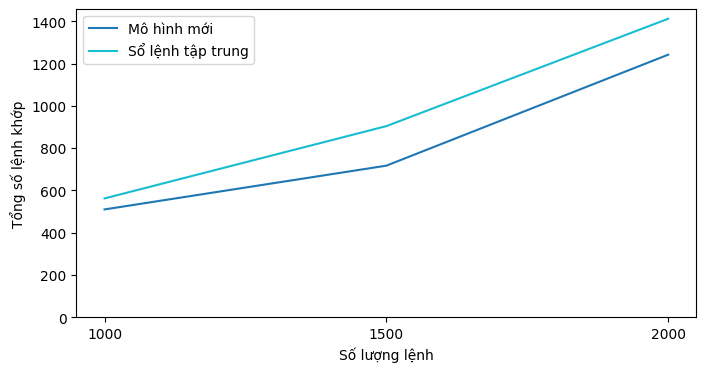

In [590]:

import matplotlib.pyplot as plt

idx = [i for i in range(len(n))]
colors =plt.cm.tab10.colors 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
for i, _m in enumerate(m):
    axes.plot(
        [
            data[f"{st[i]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderLocal"]
            + data[f"{st[i]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderOnchain"]
            for _n in n
        ],
        label=f"Mô hình mới",
        color=colors[i % len(colors)], 
    )
# CLOB
_clob = [clob_data[f"{_n}"]["NoFulfillOrders"]  for _n in n]
axes.plot(_clob, label="Sổ lệnh tập trung", color=colors[-1])
axes.set_xticks(idx)
axes.set_xticklabels(n)
axes.legend()
axes.set_xlabel("Số lượng lệnh")
axes.set_ylabel("Tổng số lệnh khớp")
axes.set_ylim(0)
plt.savefig("NoMatchedOrder_compare_with_clob.png", bbox_inches="tight")    
plt.show()

#### Average time to fulfill an order

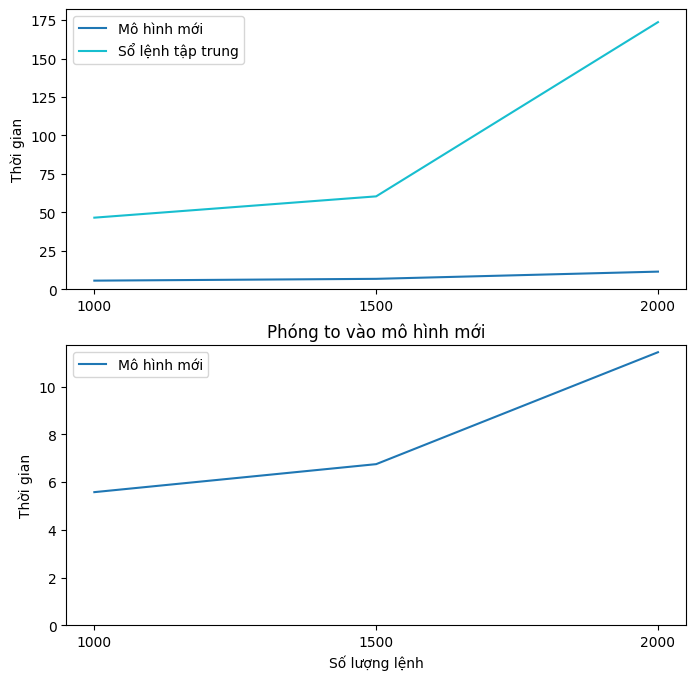

In [591]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(n))]
colors = plt.cm.tab10.colors
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
for i, _m in enumerate(m):
    axes[0].plot(
        [
            (data[f"{st[i]}_{_m}_{_n}"]["log"]["LocalMatchTime"]
            + data[f"{st[i]}_{_m}_{_n}"]["log"]["OnchainMatchTime"]) / 
            (data[f"{st[i]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderLocal"] 
            + data[f"{st[i]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderOnchain"])
            for _n in n
        ],
        label=f"Mô hình mới",
        color=colors[i % len(colors)],
    )
    axes[1].plot(
        [
            (data[f"{st[i]}_{_m}_{_n}"]["log"]["LocalMatchTime"]
            + data[f"{st[i]}_{_m}_{_n}"]["log"]["OnchainMatchTime"]) / 
            (data[f"{st[i]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderLocal"] 
            + data[f"{st[i]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderOnchain"])
            for _n in n
        ],
        label=f"Mô hình mới",
        color=colors[i % len(colors)],
    )
# CLOB
_clob = [clob_data[f"{_n}"]["TotalMatchingTime"]/clob_data[f"{_n}"]["NoFulfillOrders"] for _n in n]
axes[0].plot(_clob, label="Sổ lệnh tập trung", color=colors[-1])
axes[0].set_xticks(idx)
axes[0].set_xticklabels(n)
axes[0].set_ylabel("Thời gian")
axes[0].set_ylim(0)
axes[0].legend()

axes[1].set_xticks(idx)
axes[1].set_xticklabels(n)
axes[1].set_xlabel("Số lượng lệnh")
axes[1].set_ylabel("Thời gian")
axes[1].set_ylim(0)
axes[1].set_title("Phóng to vào mô hình mới")
axes[1].legend()
# fig.suptitle("Thời gian khớp toàn phần trung bình của một lệnh")
plt.savefig("AvgTimeToFulfillAnOrder_compare_with_clob.png", bbox_inches="tight")    
plt.show()

#### The number of orders per second

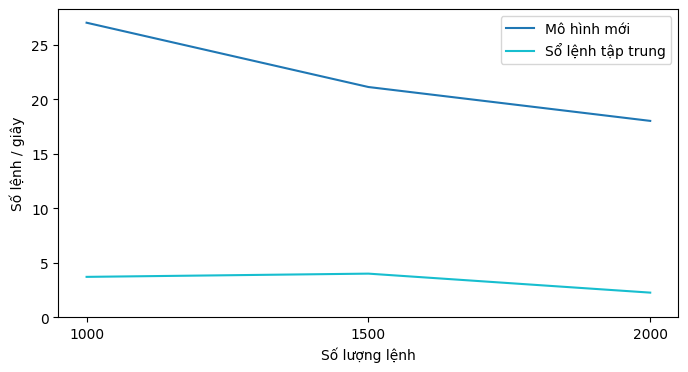

In [592]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(n))]
colors = plt.cm.tab10.colors
fig, ax = plt.subplots(figsize=(8, 4))
for i, _m in enumerate(m):
    ax.plot(
        [
            _n / 
            data[f"{st[i]}_{_m}_{_n}"]["log"]["SendOrderTime"]
            for _n in n
        ],
        label=f"Mô hình mới",
        color=colors[i % len(colors)],
    )
# CLOB
_clob = [_n/clob_data[f"{_n}"]["RunningTime"] for _n in n]
ax.plot(_clob, label="Sổ lệnh tập trung", color=colors[-1])

ax.set_xticks(idx)
ax.set_xticklabels(n)
ax.set_xlabel("Số lượng lệnh")
ax.set_ylabel("Số lệnh / giây")
ax.set_ylim(0)
ax.legend()
# fig.suptitle("Số luợng lệnh được xử lý mỗi giây")
plt.savefig("NoOrderPerSecond_compare_with_clob.png", bbox_inches="tight")    
plt.show()

#### Gas ratio

/tmp/ipykernel_35076/2716192071.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticklabels)


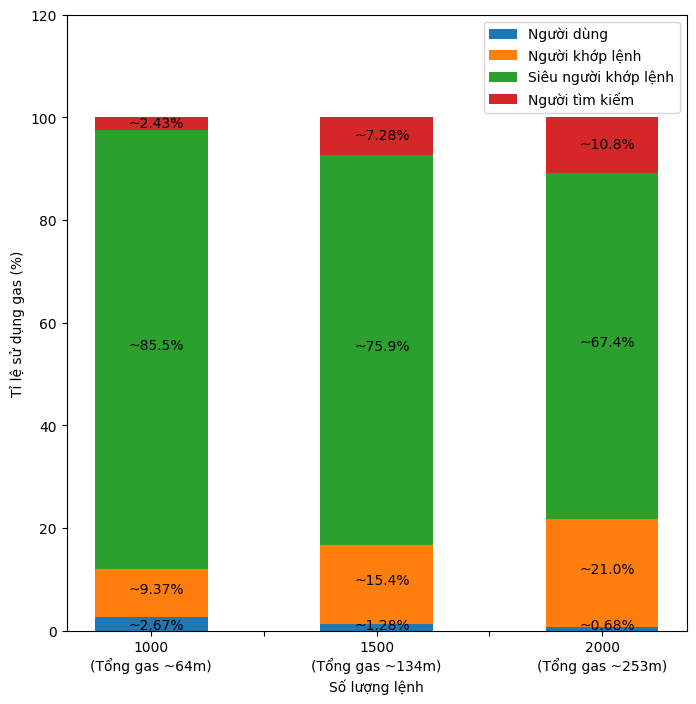

In [593]:
import matplotlib.pyplot as plt
import numpy as np
import re

colors = plt.cm.tab10.colors
x_index = [i for i in range(len(n))]
values = {
    "UserGas": [],
    "MatcherGas": [],
    "SuperMatcherGas": [],
    "SearcherGas": [],
}

TOTAL_GAS = []
_data = {}
for _n in n:
    userGas = data[f"{st[i]}_{_m}_{_n}"]["log"]["AliceGas"]
    matcherGas = data[f"{st[i]}_{_m}_{_n}"]["log"]["MatcherGas"]
    superMatcherGas = data[f"{st[i]}_{_m}_{_n}"]["log"]["SuperMatcherGas"]
    searcherGas = data[f"{st[i]}_{_m}_{_n}"]["log"]["WorkerGas"]
    _totalGas = userGas + matcherGas + superMatcherGas + searcherGas
    TOTAL_GAS.append(_totalGas)
    userGasRatio = userGas / _totalGas * 100
    matcherGasRatio = matcherGas / _totalGas * 100
    superMatcherGasRatio = superMatcherGas / _totalGas * 100
    searcherGasRatio = searcherGas / _totalGas * 100
    _data[_n] = {
        "userGasRatio": userGasRatio,
        "matcherGasRatio": matcherGasRatio,
        "superMatcherGasRatio": superMatcherGasRatio,
        "searcherGasRatio": searcherGasRatio,
    }
    values["UserGas"].append(userGasRatio)
    values["MatcherGas"].append(matcherGasRatio)
    values["SuperMatcherGas"].append(superMatcherGasRatio)
    values["SearcherGas"].append(searcherGasRatio)

bottom = np.zeros(len(n))
fig, ax = plt.subplots(figsize=(8, 8))

_name_mapping = {
    "User": "Người dùng",
    "Matcher": "Người khớp lệnh",
    "Super Matcher": "Siêu người khớp lệnh",
    "Searcher": "Người tìm kiếm"
}

for name, value in values.items():
    ax.bar(
        x_index,
        value,
        0.5,
        label=_name_mapping[" ".join(re.findall(r"[A-Z]?[a-z]+|[A-Z]+(?=[A-Z]|$)", name)[:-1])],
        bottom=bottom,
    )
    bottom += value

for i in range(len(n)):
    ax.text(x_index[i] - 0.1, 0.2, f"~{str(_data[n[i]]['userGasRatio'])[:4]}%")
    ax.text(
        x_index[i] - 0.1,
        _data[n[i]]["userGasRatio"] + _data[n[i]]["matcherGasRatio"] / 2,
        f"~{str(_data[n[i]]['matcherGasRatio'])[:4]}%",
    )
    ax.text(
        x_index[i] - 0.1,
        _data[n[i]]["userGasRatio"]
        + _data[n[i]]["matcherGasRatio"]
        + _data[n[i]]["superMatcherGasRatio"] / 2,
        f"~{str(_data[n[i]]['superMatcherGasRatio'])[:4]}%",
    )
    ax.text(
        x_index[i] - 0.1,
        _data[n[i]]["userGasRatio"]
        + _data[n[i]]["matcherGasRatio"]
        + _data[n[i]]["superMatcherGasRatio"]
        + _data[n[i]]["searcherGasRatio"] / 2
        - 0.7,
        f"~{str(_data[n[i]]['searcherGasRatio'])[:4]}%",
    )


x_ticklabels = [
    "",
    f"1000\n(Tổng gas ~{str(TOTAL_GAS[0])[:-6]}m)",
    "",
    f"1500\n(Tổng gas ~{str(TOTAL_GAS[1])[:-6]}m)",
    "",
    f"2000\n(Tổng gas ~{str(TOTAL_GAS[2])[:-6]}m)",
]
ax.set_xticklabels(x_ticklabels)
ax.set_xlabel("Số lượng lệnh")
ax.set_ylabel("Tỉ lệ sử dụng gas (%)")
# ax.set_title("Tỉ lệ sử dụng gas của các thành phần trong giao thức")
ax.set_ylim(0, 120)
plt.legend()
plt.savefig("GasUsedRatio_compare_with_clob.png", bbox_inches="tight")    
plt.show()

#### profit

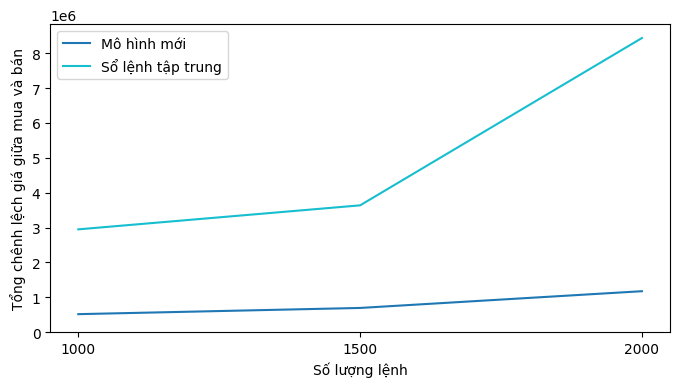

In [594]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(n))]
colors = plt.cm.tab10.colors
fig, ax = plt.subplots(figsize=(8, 4))
for i, _m in enumerate(m):
    ax.plot(
        [
            data[f"{st[i]}_{_m}_{_n}"]["log"]["TotalRawProfitLocal"]
            + data[f"{st[i]}_{_m}_{_n}"]["log"]["TotalRawProfitOnchain"]
            for _n in n
        ],
        label=f"Mô hình mới",
        color=colors[i % len(colors)],
    )
# CLOB
_clob = [clob_data[f"{_n}"]["RawProfit"] for _n in n]
ax.plot(_clob, label="Sổ lệnh tập trung", color=colors[-1])

ax.set_xticks(idx)
ax.set_xticklabels(n)
ax.set_ylim(0)
ax.set_xlabel("Số lượng lệnh")
ax.set_ylabel("Tổng chênh lệch giá giữa mua và bán")
ax.legend()
plt.savefig("RawProfit_compare_with_clob.png", bbox_inches="tight")    
plt.show()

#### Fulfill ratio

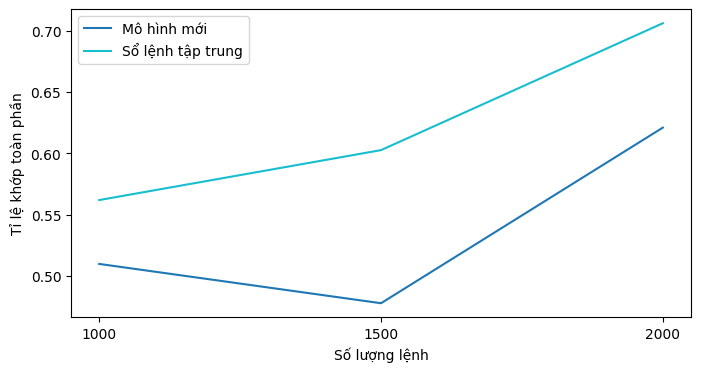

In [595]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(n))]
colors = plt.cm.tab10.colors
fig, ax = plt.subplots(figsize=(8, 4))
for i, _m in enumerate(m):
    ax.plot(
        [
            (data[f"{st[i]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderLocal"]
            + data[f"{st[i]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderOnchain"]) / _n
            for _n in n
        ],
        label=f"Mô hình mới",
        color=colors[i % len(colors)],
    )
# CLOB
_clob = [clob_data[f"{_n}"]["NoFulfillOrders"]/_n for _n in n]
ax.plot(_clob, label="Sổ lệnh tập trung", color=colors[-1])

ax.set_xticks(idx)
ax.set_xticklabels(n)
ax.set_xlabel("Số lượng lệnh")
ax.set_ylabel("Tỉ lệ khớp toàn phần")
ax.legend()
plt.savefig("FulfillRatio_compare_with_clob.png", bbox_inches="tight")    
# fig.suptitle("Fulfill ratio")
plt.show()